In [34]:
import geopandas as gpd

In [35]:
# shapefile = gpd.read_file("../data/MetraStations/MetraStations.shp")

metra_df = gpd.read_file("../data/MetraStations")
bus_df = gpd.read_file("../data/CTA_BusStops")

<AxesSubplot: >

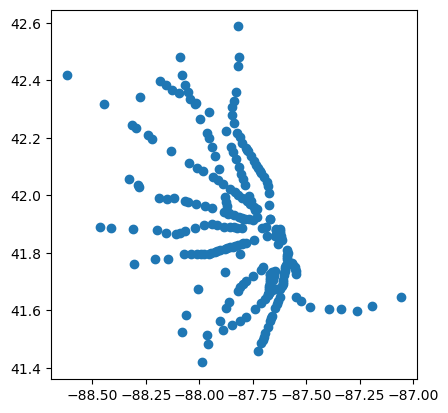

In [36]:
# convert to lat-long
metra_df = metra_df.to_crs(epsg=4326)
metra_df.plot()

<AxesSubplot: >

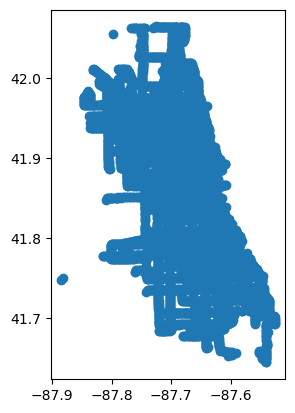

In [37]:
bus_df = bus_df.to_crs(epsg=4326)
bus_df.plot()

In [44]:
import math
import numpy as np
from geopy import distance

def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_closest_metra(df, x, y):
    coords = df['geometry'].get_coordinates()

    # find min distance station
    idx = np.argmin(np.sqrt(np.square(coords['x'].values - x) + np.square(coords['y'].values - y)))
    return coords['x'][idx], coords['y'][idx] 

def find_distance_to_closest_metra(df, x, y):
    metra_coords = find_closest_metra(df, x, y)

    return distance.distance((x, y), metra_coords).mi

print(find_distance_to_closest_metra(metra_df, -88.021, 42.232))
print(find_distance_to_closest_metra(bus_df, -87.721, 41.632))


4.069279504681751
0.17211685180578556


In [43]:
bus_df[bus_df['CITY'] == 'CHICAGO']
# bus_df['geometry']

,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM,geometry
0,5282.0,JEFFERY,97TH STREET,NB,MT,15,None,CHICAGO,Jeffery & 97th Street,POINT (-87.57521 41.71888)
1,1143.0,STOCKTON,WEBSTER,NB,NT,"151,156",None,CHICAGO,Stockton & Webster,POINT (-87.63563 41.92192)
3,6501.0,WENTWORTH,3200 SOUTH,SB,MB,"24,31",None,CHICAGO,3200 S Wentworth,POINT (-87.63168 41.83648)
4,1593.0,MICHIGAN,14TH STREET,SB,FS,"1,3,4",N4,CHICAGO,Michigan & 14th Street,POINT (-87.62419 41.86388)
5,17175.0,MILWAUKEE,LAWRENCE,SEB,FS,56,None,CHICAGO,Milwaukee & Lawrence,POINT (-87.76069 41.96772)
...,...,...,...,...,...,...,...,...,...,...
10752,18164.0,CALIFORNIA,ARCHER,SB,FS,94,None,CHICAGO,California & Archer,POINT (-87.69463 41.81958)
10753,18165.0,DIVISION,LEAVITT,WB,FS,70,None,CHICAGO,Division & Leavitt,POINT (-87.68240 41.90317)
10756,18084.0,69TH STREET,DAMEN,EB,FS,67,None,CHICAGO,69th Street & Damen,POINT (-87.67337 41.76837)
10758,7111.0,STONY ISLAND,84TH STREET,NB,NS,28,None,CHICAGO,Stony Island & 84th Street,POINT (-87.58530 41.74246)


In [32]:

bus_routes = gpd.read_file("../data/CTA_BusRoutes").to_crs(epsg=4326)

bus_routes

,ROUTE,ROUTE0,NAME,WKDAY,SAT,SUN,SHAPE_LEN,geometry
0,12,012,ROOSEVELT,1,1,1,62586.111408,"MULTILINESTRING ((-87.64791 41.86713, -87.6474..."
1,121,121,UNION/STREETERVILLE EXPRESS,1,0,0,24090.823988,"MULTILINESTRING ((-87.62450 41.88833, -87.6249..."
2,1,001,BRONZEVILLE/UNION STATION,1,0,0,34690.953676,"MULTILINESTRING ((-87.62326 41.83103, -87.6232..."
3,108,108,HALSTED/95TH,1,0,0,71888.990825,"MULTILINESTRING ((-87.59053 41.65577, -87.5906..."
4,11,011,LINCOLN,1,1,1,24694.573889,"MULTILINESTRING ((-87.68883 41.96676, -87.6888..."
...,...,...,...,...,...,...,...,...
123,120,120,OGILVIE/STREETERVILLE EXPRESS,1,0,0,19816.037215,"MULTILINESTRING ((-87.62450 41.88833, -87.6249..."
124,126,126,JACKSON,1,1,1,67746.952693,"MULTILINESTRING ((-87.77390 41.87647, -87.7739..."
125,20,020,MADISON,1,1,1,54335.296018,"MULTILINESTRING ((-87.77391 41.88008, -87.7731..."
126,128,128,SOLDIER FIELD EXPRESS,0,0,0,24871.988685,"MULTILINESTRING ((-87.61699 41.86502, -87.6153..."


In [42]:
print(bus_routes['geometry'][0])

MULTILINESTRING ((-87.64790999981973 41.867129999821366, -87.6474599997108 41.86713999996754, -87.64737999991566 41.867140000251396, -87.64688999916365 41.8671499996307, -87.64636000015456 41.867159999859545, -87.6457400001297 41.867169999936074, -87.6451600004367 41.86718000047094, -87.6447099997044 41.86717999963311, -87.64450999950209 41.86718000039608, -87.64432000034138 41.86718000048932, -87.64409000045633 41.867189999808375, -87.6436500004068 41.86720000002018, -87.64339999978965 41.86720000018505, -87.642770000336 41.86720999978148, -87.64218999986505 41.867219999714855, -87.64174999991323 41.86721999974354, -87.64140999951213 41.86722000008164, -87.64072999919748 41.86722999964657, -87.6401299997806 41.86724000001397, -87.64000000068715 41.867240000367566, -87.63975999978004 41.86723999985626, -87.6392400000517 41.867249999696995, -87.63857000015105 41.867260000091605, -87.63827999997129 41.867260000118804), (-87.64790999981973 41.867129999821366, -87.64819999974526 41.8670800

In [33]:

metra_routes = gpd.read_file("../data/MetraLines").to_crs(epsg=4326)

metra_routes

,ASSET_ID,LINES,DESCRIPTIO,EDIT_INIT,EDIT_DATE,geometry
0,21200078.0,Electric,18th St. (2.2) to 19th St. Merge,hm,1995-08-02,"LINESTRING (-87.61803 41.85773, -87.61754 41.8..."
1,21200075.0,"Electric, S. Shore",19th St. Merge (no junction) to McCormick Plac...,hm,1995-08-02,"LINESTRING (-87.61733 41.85658, -87.61723 41.8..."
2,21200001.0,"Electric, S. Shore",11th Pl. Divide to 19th St. Merge,aef,2001-03-08,"LINESTRING (-87.61957 41.86375, -87.61924 41.8..."
3,21200212.0,"UP-N, UP-NW, UP-W",Ogilvie Station to Clinton St. Junction,hm,1995-08-02,"LINESTRING (-87.64214 41.88963, -87.64195 41.8..."
4,21200211.0,"Milw-N, Milw-W, NCS",Union Station (North) to Western Ave. Interloc...,aef,2001-11-05,"LINESTRING (-87.68604 41.88844, -87.68553 41.8..."
...,...,...,...,...,...,...
255,21200284.0,BNSF,Route 59 (31.6) to Aurora (37.5),ml,2001-02-13,"LINESTRING (-88.20852 41.77813, -88.21362 41.7..."
256,21200234.0,"Electric, S. Shore",Randolph St. to Van Buren St. (0.8),aef,2001-03-08,"LINESTRING (-87.62309 41.88437, -87.62281 41.8..."
257,21200235.0,"Electric, S. Shore",Van Buren St. (0.8) to Roosevelt Rd. (1.4),aef,2001-03-08,"LINESTRING (-87.62281 41.87700, -87.62274 41.8..."
258,21200079.0,"Electric, S. Shore",Roosevelt Rd. (1.4) to 11th Pl. Divide,hm,1995-08-02,"LINESTRING (-87.62142 41.86839, -87.62117 41.8..."
